In [15]:
import pandas as pd

# Завантаження даних (замініть шлях на свій файл)
df = pd.read_csv("testTask2.csv")

# Перетворення колонок до datetime
df['request_time'] = pd.to_datetime(df['request_time'])
df['start_time'] = pd.to_datetime(df['start_time'])
df['finish_time'] = pd.to_datetime(df['finish_time'])

# Обчислення часу очікування та часу виконання
df['wait_time_min'] = (df['start_time'] - df['request_time']).dt.total_seconds() / 60
df['work_time_min'] = (df['finish_time'] - df['start_time']).dt.total_seconds() / 60

# Загальні метрики
avg_wait = df['wait_time_min'].mean()
avg_work = df['work_time_min'].mean()
over_15_min = (df['wait_time_min'] > 15).mean() * 100
over_45_min = (df['wait_time_min'] > 45).mean() * 100
over_5_work = (df['work_time_min'] > 5).mean() * 100

print("📊 Загальний аналіз служби підтримки:")
print(f"Середній час очікування: {avg_wait:.2f} хв")
print(f"Середній час виконання: {avg_work:.2f} хв")
print(f"Запитів з очікуванням >15 хв: {over_15_min:.1f}%")
print(f"Запитів з очікуванням >45 хв: {over_45_min:.1f}%")
print(f"Запитів з обробкою >5 хв: {over_5_work:.1f}%")

# Аналіз по модераторам
print("\n👤 Аналіз по модераторам:")
moderator_stats = df.groupby('moderator').agg({
    'wait_time_min': ['count', 'median'],
    'work_time_min': 'mean'
}).round(2)

moderator_stats.columns = ['К-сть запитів', 'Середнє очікування (хв)', 'Середній час роботи (хв)']
print(moderator_stats)


📊 Загальний аналіз служби підтримки:
Середній час очікування: 2468.73 хв
Середній час виконання: 2.24 хв
Запитів з очікуванням >15 хв: 91.9%
Запитів з очікуванням >45 хв: 78.3%
Запитів з обробкою >5 хв: 10.7%

👤 Аналіз по модераторам:
           К-сть запитів  Середнє очікування (хв)  Середній час роботи (хв)
moderator                                                                  
102                 1321                  4489.03                      1.86
103                 1313                  3251.48                      2.29
109                  827                    42.40                      1.52
110                    1                     7.13                      1.30
111                  569                    44.75                      1.83
112                 1717                  4484.40                      2.28
114                   60                    44.95                      2.58
116                  580                   234.57                      2.25
117  

⏰ Bursts of long-wait requests:
            request_hour  count
1463 2020-12-11 09:00:00    143
1416 2020-12-09 06:00:00    137
1086 2020-11-25 03:00:00    131
1303 2020-12-04 08:00:00    122
1300 2020-12-04 05:00:00    120


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_87476/1828136407.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  long_wait_df['request_hour'] = long_wait_df['request_time'].dt.floor('H')


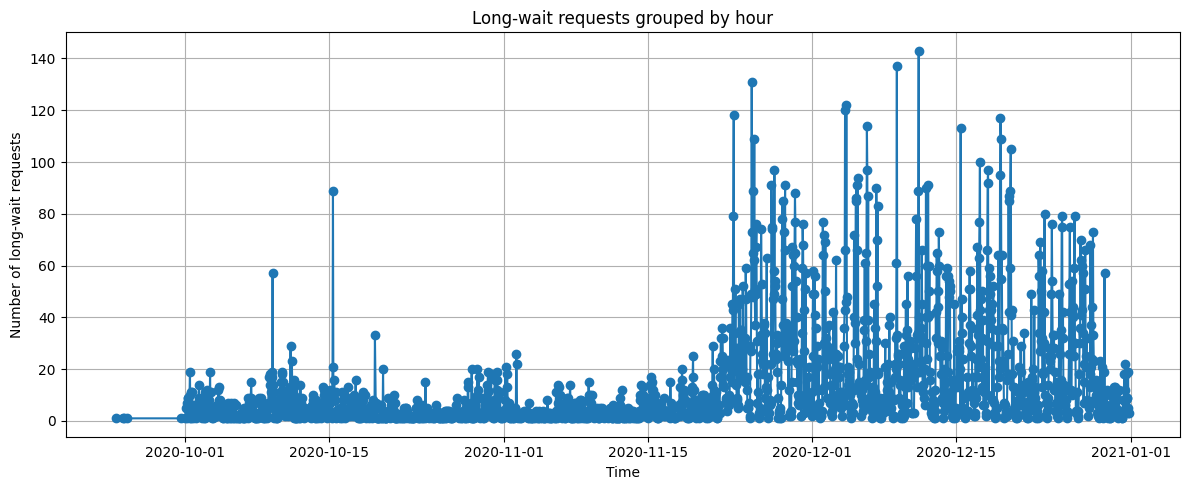

In [16]:
# import pandas as pd
from matplotlib import pyplot as plt
long_wait_df = df[df['wait_time_min'] > 45].copy()

# Round request_time to nearest hour to group similar requests
long_wait_df['request_hour'] = long_wait_df['request_time'].dt.floor('H')

# Count number of long-wait requests per hour
burst_analysis = long_wait_df.groupby('request_hour').size().reset_index(name='count')

# Show "bursts" of long-wait requests
print("⏰ Bursts of long-wait requests:")
print(burst_analysis.sort_values(by='count', ascending=False).head())

# Optional: plot it
plt.figure(figsize=(12, 5))
plt.plot(burst_analysis['request_hour'], burst_analysis['count'], marker='o')
plt.title("Long-wait requests grouped by hour")
plt.xlabel("Time")
plt.ylabel("Number of long-wait requests")
plt.grid(True)
plt.tight_layout()
plt.show()

⏰ Long-wait requests by hour of day:
    hour_of_day  count
0             0    587
1             1   1507
2             2   1818
3             3   1910
4             4   1058
5             5   1450
6             6   1934
7             7   2183
8             8   2705
9             9   2359
10           10   1346
11           11   1473
12           12   1243
13           13   1237
14           14   1143
15           15    992
16           16    606
17           17    466
18           18    340
19           19    344
20           20    300
21           21    278
22           22    273
23           23    352


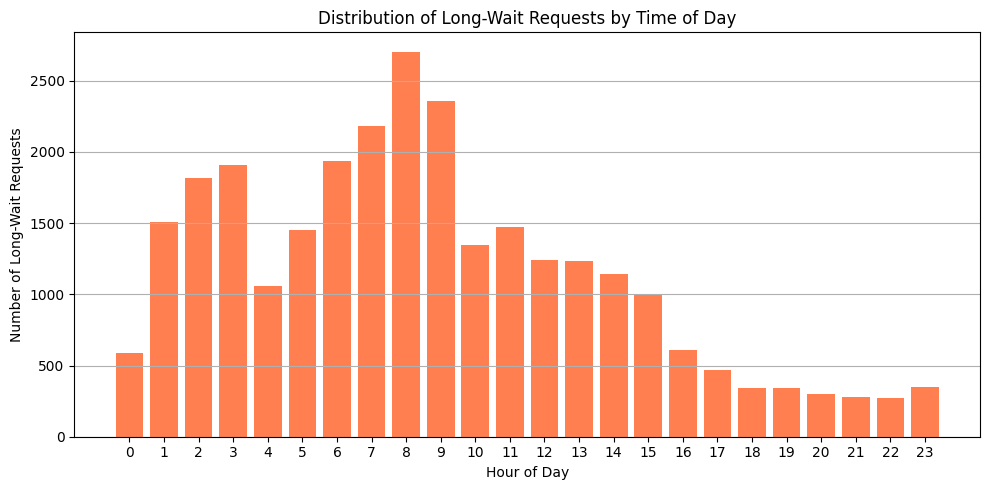

In [17]:
# Add hour-of-day column (0 to 23)
long_wait_df['hour_of_day'] = long_wait_df['request_time'].dt.hour

# Count number of long-wait requests per hour
hourly_distribution = long_wait_df.groupby('hour_of_day').size().reset_index(name='count')

# Sort by hour (just to be safe)
hourly_distribution = hourly_distribution.sort_values(by='hour_of_day')

# Display results
print("⏰ Long-wait requests by hour of day:")
print(hourly_distribution)

# Optional: visualize it
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(hourly_distribution['hour_of_day'], hourly_distribution['count'], color='coral')
plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Long-Wait Requests")
plt.title("Distribution of Long-Wait Requests by Time of Day")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


⏰ Long-wait requests by hour of day:
    hour_of_day  count
0             0      7
1             6      3
2             7   3111
3             8   2571
4             9   2611
5            10   2446
6            11   2648
7            12   2052
8            13   1998
9            14   1620
10           15   1268
11           16   1393
12           17   1308
13           18   1219
14           19   1058
15           20   1077
16           21    739
17           22    771
18           23      4


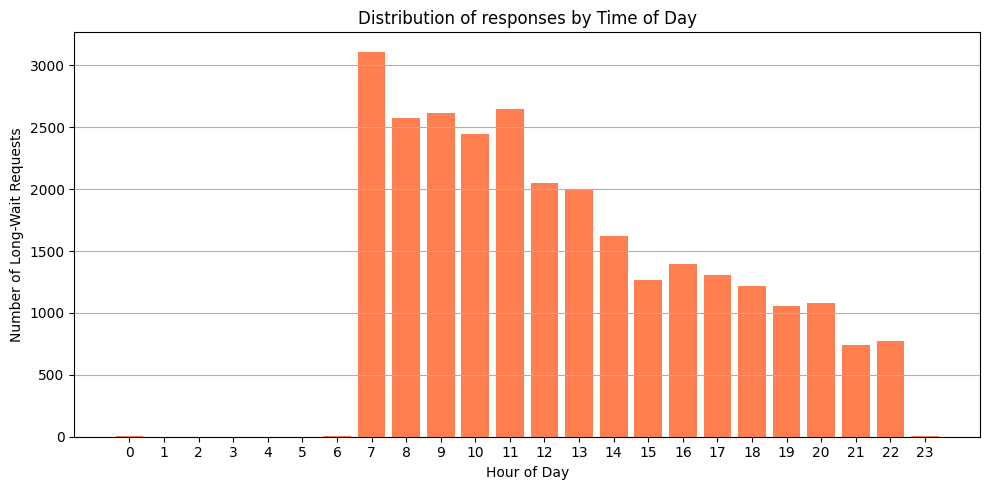

In [18]:
# Add hour-of-day column (0 to 23)
long_wait_df['hour_of_day'] = long_wait_df['start_time'].dt.hour

# Count number of long-wait requests per hour
hourly_distribution = long_wait_df.groupby('hour_of_day').size().reset_index(name='count')

# Sort by hour (just to be safe)
hourly_distribution = hourly_distribution.sort_values(by='hour_of_day')

# Display results
print("⏰ Long-wait requests by hour of day:")
print(hourly_distribution)

# Optional: visualize it
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(hourly_distribution['hour_of_day'], hourly_distribution['count'], color='coral')
plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Long-Wait Requests")
plt.title("Distribution of responses by Time of Day")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

👥 Number of moderators active per hour of day:
    hour_of_day  num_moderators
0             0               1
1             6               3
2             7              35
3             8              34
4             9              38
5            10              38
6            11              38
7            12              36
8            13              34
9            14              35
10           15              22
11           16              16
12           17              15
13           18              15
14           19              14
15           20              14
16           21              13
17           22              13
18           23               3


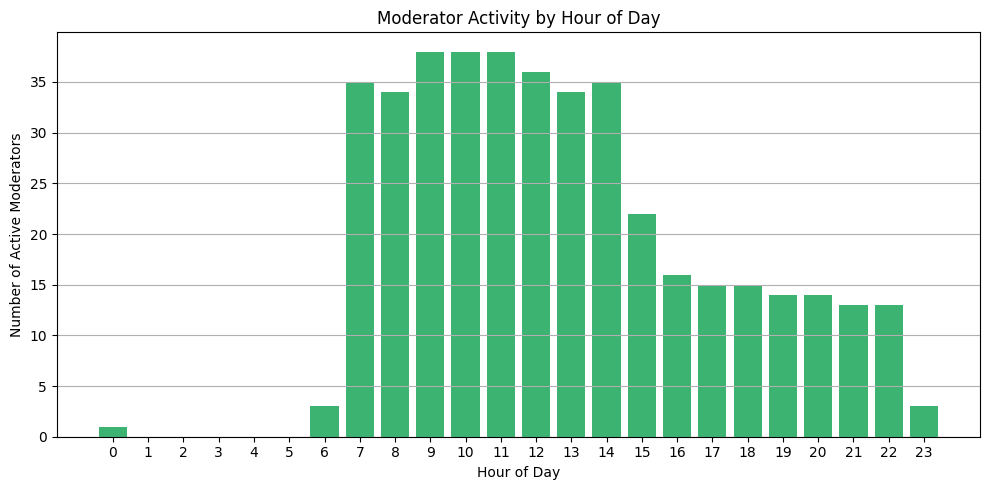

In [19]:
from datetime import timedelta

# List to collect (hour_of_day, moderator) pairs
hourly_records = []

for _, row in df.iterrows():
    start = row['start_time']
    end = row['finish_time']
    current = start

    # Loop through every hour this moderator was working
    while current < end:
        hourly_records.append({
            'hour_of_day': current.hour,  # Extract only the hour (0–23)
            'moderator': row['moderator']
        })
        current += timedelta(hours=1)

# Build DataFrame
hourly_df = pd.DataFrame(hourly_records)

# Count unique moderators per hour of day
moderator_activity = hourly_df.groupby('hour_of_day')['moderator'].nunique().reset_index(name='num_moderators')
moderator_activity = moderator_activity.sort_values(by='hour_of_day')

# Show results
print("👥 Number of moderators active per hour of day:")
print(moderator_activity)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(moderator_activity['hour_of_day'], moderator_activity['num_moderators'], color='mediumseagreen')
plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Active Moderators")
plt.title("Moderator Activity by Hour of Day")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # from datetime import timedelta

# # # --- Prepare long-wait requests ---
# long_wait_df = df.copy()
# long_wait_df['request_time'] = pd.to_datetime(long_wait_df['request_time'])
# long_wait_df['start_time'] = pd.to_datetime(long_wait_df['start_time'])
# long_wait_df['finish_time'] = pd.to_datetime(long_wait_df['finish_time'])

# # Calculate wait time
# long_wait_df['wait_time_min'] = (long_wait_df['start_time'] - long_wait_df['request_time']).dt.total_seconds() / 60
# long_wait_df = long_wait_df[long_wait_df['wait_time_min'] > 45]

# # --- 1. Long-wait request submissions ---
# long_wait_df['request_hour'] = long_wait_df['request_time'].dt.hour
# request_counts = long_wait_df.groupby('request_hour').size().reset_index(name='requests')

# # --- 2. Long-wait request responses ---
# long_wait_df['response_hour'] = long_wait_df['start_time'].dt.hour
# response_counts = long_wait_df.groupby('response_hour').size().reset_index(name='responses')

# # --- 3. Active moderators per hour ---
# hourly_records = []

# for _, row in df.iterrows():
#     start = row['start_time']
#     end = row['finish_time']
#     current = start

#     while current < end:
#         hourly_records.append({
#             'hour_of_day': current.hour,
#             'moderator': row['moderator']
#         })
#         current += timedelta(hours=1)

# hourly_df = pd.DataFrame(hourly_records)
# moderator_counts = hourly_df.groupby('hour_of_day')['moderator'].nunique().reset_index(name='moderators')
# moderator_counts = moderator_counts.rename(columns={'hour_of_day': 'hour'})

# # --- Merge all three into one DataFrame ---
# full_data = pd.DataFrame({'hour': range(24)})
# full_data = full_data.merge(request_counts.rename(columns={'request_hour': 'hour'}), on='hour', how='left')
# full_data = full_data.merge(response_counts.rename(columns={'response_hour': 'hour'}), on='hour', how='left')
# full_data = full_data.merge(moderator_counts, on='hour', how='left')
# full_data.fillna(0, inplace=True)



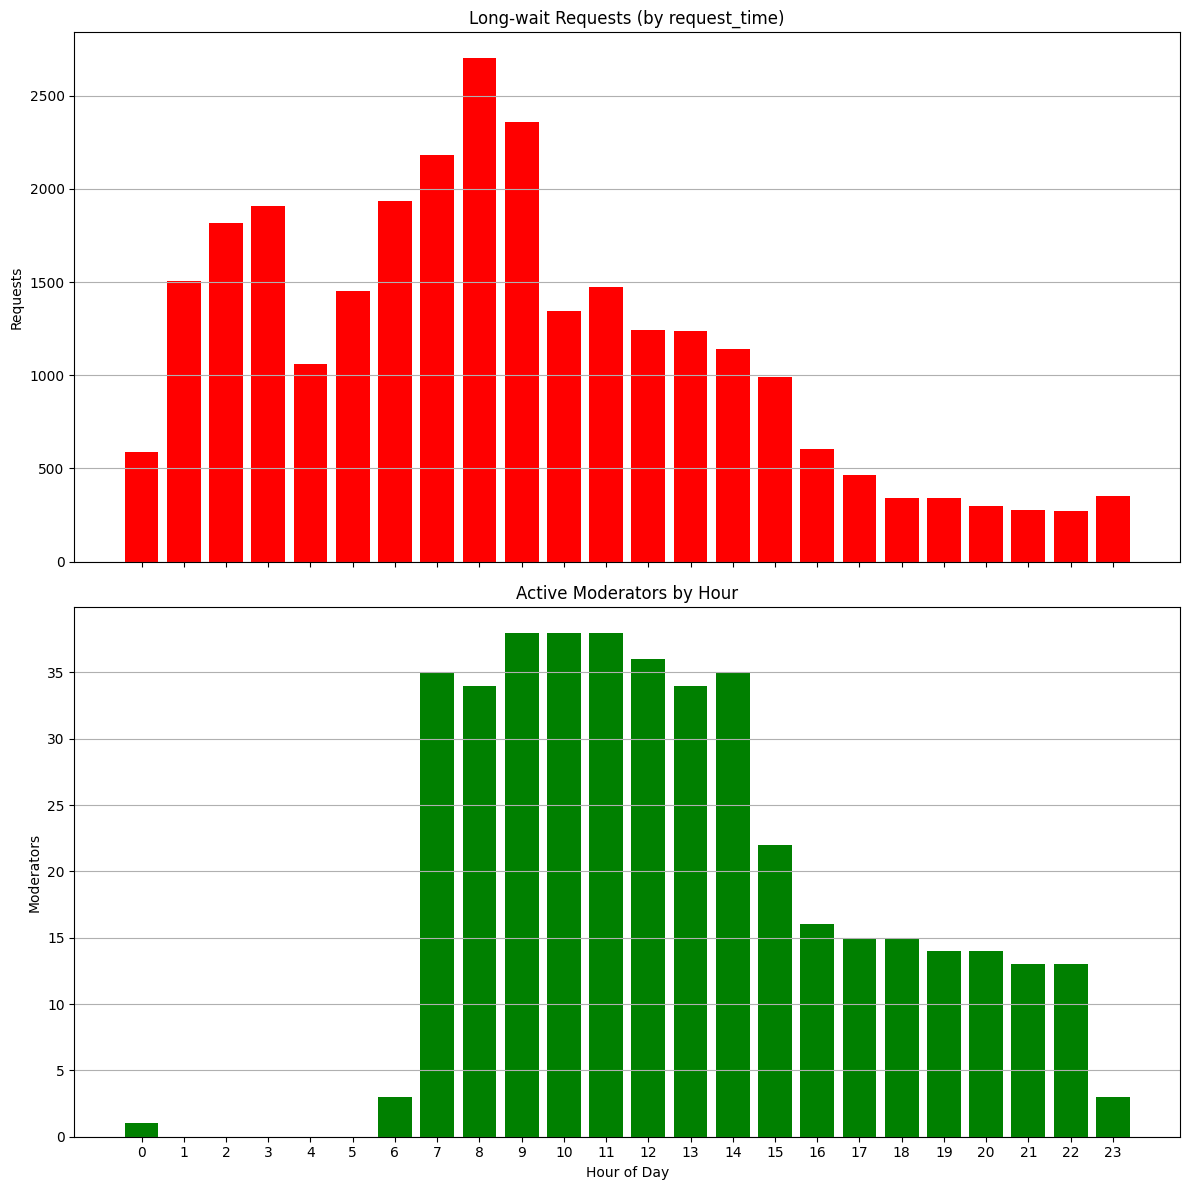

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# --- Plot 1: Long-wait Requests by request_time ---
axes[0].bar(request_counts['request_hour'], request_counts['requests'], color='red')
axes[0].set_title("Long-wait Requests (by request_time)")
axes[0].set_ylabel("Requests")
axes[0].grid(axis='y')

# --- Plot 2: Long-wait Responses by start_time ---
# axes[1].bar(response_counts['response_hour'], response_counts['responses'], color='orange')
# axes[1].set_title("Long-wait Responses (by start_time)")
# axes[1].set_ylabel("Responses")
# axes[1].grid(axis='y')

# --- Plot 3: Active Moderators ---
axes[1].bar(moderator_counts['hour'], moderator_counts['moderators'], color='green')
axes[1].set_title("Active Moderators by Hour")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Moderators")
axes[1].grid(axis='y')
axes[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()